In [1]:
import os
os.chdir("C:\\Users\\User\Documents\GitHub")

In [2]:
from Projet_Option_Mazars.preprocessing import *
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.figsize'] = [15,5]

data_contrats = pd.read_csv('Projet_Option_Mazars/train_contrats.csv',sep=";")
data_contrats["Freq_sinistre"] = data_contrats["nombre_de_sinistre"]/data_contrats["Exposition_au_risque"]

In [3]:
df = preprocessing(data_contrats, balance=False, train_size=1)[0]
#df = df[:10000]
X = df.drop("Freq_sinistre", axis=1, inplace=False).to_numpy()
Y = np.array(df["Freq_sinistre"])

C:\Users\User\Documents\GitHub\Projet_Option_Mazars\preprocessing.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clustering["Classe_Age_Situ_Cont"]=data_clustering["Classe_Age_Situ_Cont"].apply(classe_age)
C:\Users\User\Documents\GitHub\Projet_Option_Mazars\preprocessing.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_clustering["franchise"]=data_clustering["franchise"].apply(franchise_)


In [4]:
df

,Classe_Age_Situ_Cont,Type_Apporteur,Activite,Zone,franchise,FORMULE,Exposition_au_risque,ValeurPuissance,Freq_sinistre,Mode_gestion_N,Mode_gestion_P,Fractionnement_A,Fractionnement_S,Fractionnement_T,Age_du_vehicule_<= 5 ans,Age_du_vehicule_> 5 ans
0,0.492694,0.082116,0.246347,0.328462,0.246347,0.410578,0.045164,0.574809,0.0,0.082116,0.0,0.082116,0.000000,0.000000,0.082116,0.000000
1,0.396316,0.158527,0.554843,0.317053,0.158527,0.237790,0.032498,0.554843,0.0,0.079263,0.0,0.000000,0.079263,0.000000,0.000000,0.079263
2,0.396460,0.158584,0.555044,0.317168,0.158584,0.237876,0.018237,0.555044,0.0,0.079292,0.0,0.000000,0.079292,0.000000,0.000000,0.079292
3,0.419491,0.167796,0.587287,0.335593,0.167796,0.419491,0.021814,0.335593,0.0,0.083898,0.0,0.000000,0.083898,0.000000,0.083898,0.000000
4,0.484980,0.161660,0.565810,0.323320,0.161660,0.404150,0.019399,0.323320,0.0,0.080830,0.0,0.000000,0.080830,0.000000,0.080830,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87223,0.503370,0.083895,0.503370,0.167790,0.167790,0.251685,0.023491,0.587265,0.0,0.083895,0.0,0.000000,0.000000,0.083895,0.083895,0.000000
87224,0.503370,0.083895,0.503370,0.167790,0.167790,0.251685,0.023491,0.587265,0.0,0.083895,0.0,0.000000,0.000000,0.083895,0.083895,0.000000
87225,0.503463,0.083911,0.503463,0.167821,0.167821,0.251732,0.013426,0.587374,0.0,0.083911,0.0,0.000000,0.000000,0.083911,0.000000,0.083911
87226,0.503370,0.083895,0.503370,0.167790,0.167790,0.251685,0.023491,0.587265,0.0,0.083895,0.0,0.000000,0.000000,0.083895,0.083895,0.000000


In [5]:
from sklearn.neighbors import KDTree

In [6]:
df_drop = df.drop("Freq_sinistre", axis=1)
tree = KDTree(df_drop.values)

In [7]:
def approx(df_drop, y, i, dist, ind, var):
    """
    Approximates the value of Freq_sinistre for row i 
    """
    delta_y = (y-y[i])[ind]
    gauss_weights = np.exp(-dist / var)
    y_hat = max(y[i]+ np.dot(delta_y, gauss_weights),0)
    return y_hat

In [10]:
import time
t0 = time.time()
dist, ind = tree.query(features.values.reshape(1, -1), k=80000)
n = np.sum(dist<thresh)
dist = dist[0][:n]
ind = ind[0][:n]
y_hat = approx(df_drop, Y, i, dist, ind, var)
t1 = time.time()
print("Temps pour une execution : " + str(round(t1-t0,3)))

NameError: name 'features' is not defined

Pour les 80000 points du jeu de données, il faut donc compter près de 400 secondes. Cela reste raisonnable. Toutefois, pour trouver la bonne valeur de la variance, il faudra faire cela plusieurs fois ce qui peut prendre du temps. On va commencer par k = 1000 : on ne considère à chaque fois que les 1000 plus proches voisins pour chaue profile.

In [43]:
thresh = 0.25
k=1000
var=np.exp(-5)

Y_hat = []
Y = df["Freq_sinistre"].values

for i in range(len(df)):
    if i % 100 == 0:
        print(i)
    features = df_drop.iloc[i]
    dist, ind = tree.query(features.values.reshape(1, -1), k=k)
    n = np.sum(dist<thresh)
    dist = dist[0][:n]
    ind = ind[0][:n]
    N.append(n)
    y_hat = approx(df_drop, Y, i, dist, ind, var)
    Y_hat.append(y_hat)


0
100
200
300
400
500
600
700
800
900


[3010,
 6473,
 6439,
 1575,
 2082,
 1453,
 1406,
 83,
 1921,
 4047,
 750,
 1454,
 1059,
 299,
 194,
 852,
 3065,
 3089,
 2392,
 69,
 196,
 5375,
 2080,
 3683,
 1644,
 1598,
 816,
 6626,
 4660,
 4653,
 6931,
 6705,
 6666,
 6626,
 6542,
 6628,
 4531,
 4550,
 2019,
 1966,
 2947,
 2922,
 2457,
 2744,
 1879,
 2523,
 3785,
 4146,
 1101,
 1996,
 3660,
 1148,
 962,
 1149,
 1163,
 962,
 1103,
 362,
 1163,
 362,
 361,
 358,
 1003,
 725,
 1162,
 365,
 361,
 846,
 1150,
 1073,
 358,
 362,
 962,
 1140,
 1159,
 1150,
 1140,
 1149,
 1148,
 1144,
 962,
 365,
 297,
 365,
 305,
 1148,
 962,
 1162,
 1120,
 3490,
 1187,
 1085,
 4209,
 6938,
 9576,
 9584,
 8727,
 4464,
 9658,
 9659,
 4659,
 72,
 74,
 8531,
 7521,
 4571,
 4855,
 2860,
 6542,
 6542,
 6426,
 6253,
 4720,
 4708,
 4720,
 4708,
 6108,
 6268,
 6065,
 4708,
 4720,
 5868,
 6538,
 6065,
 7720,
 7386,
 716,
 441,
 16,
 307,
 431,
 2581,
 2533,
 2470,
 948,
 1047,
 1592,
 1592,
 377,
 372,
 381,
 3123,
 3047,
 419,
 1384,
 72,
 419,
 978,
 1360,
 978,

In [9]:
def approx_freq(df, thresh, k, var):
    """
    approximates the Freq_sinisre column and inflate zeros
    
    parameters :
    thresh : part of the space points to select (maximum distance between a point and one of the selected neighbour)
    k : first neighbours to search in KDTree. This may affect computationnal time.
    var : vairance of the gaussian distance
    """
    Y_hat = []
    Y = df["Freq_sinistre"].values
    N=[]
    for i in range(len(df)):
        if i % 10000 == 0:
            print(i)
        features = df_drop.iloc[i]
        # select k nearest neigbours
        dist, ind = tree.query(features.values.reshape(1, -1), k=k)
        # select only those not too far (to be discussed)
        n = np.sum(dist<thresh)
        dist = dist[0][:n]
        ind = ind[0][:n]
        N.append(n)
        y_hat = approx(df_drop, Y, i, dist, ind, var)
        Y_hat.append(y_hat)
    df_copy = df.copy()
    df_copy["Freq_sinistre"] = Y_hat
    print()
    return df_copy
    

In [15]:
thresh = 0.25
k=1000
var=np.exp(-5)
df_approx = approx_freq(df, thresh, k, var)

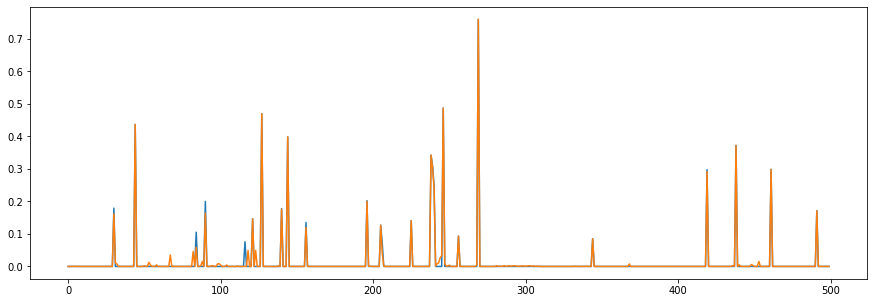

In [18]:
plt.plot(range(500),df.Freq_sinistre[:500])
plt.plot(range(500),df_approx.Freq_sinistre[:500])

In [19]:
count_zeros(df_approx["Freq_sinistre"],10**(-6))

0.7257990553491998

In [12]:
thresh = 0.25
k=100
var=np.exp(-4.5)
errList = []
countList = []
logVarList = np.linspace(-7,4,15)
#varList = [0.01,0.05,0.1,0.5,1,5]
for logVar in logVarList:
    print(logVar)
    var = np.exp(logVar)
    #print(var)
    df_approx = approx_freq(df, thresh, k, var)
    Y_hat = df_approx["Freq_sinistre"]
    err = np.sqrt(np.mean((Y-Y_hat)**2))
    countList.append(count_zeros(Y_hat,10**(-6)))
    errList.append(err)

-7.0

-6.214285714285714

-5.428571428571429

-4.642857142857142

-3.857142857142857

-3.0714285714285716

-2.2857142857142856

-1.5

-0.7142857142857144

0.07142857142857117

0.8571428571428568

1.6428571428571423

2.428571428571429

3.2142857142857135

4.0



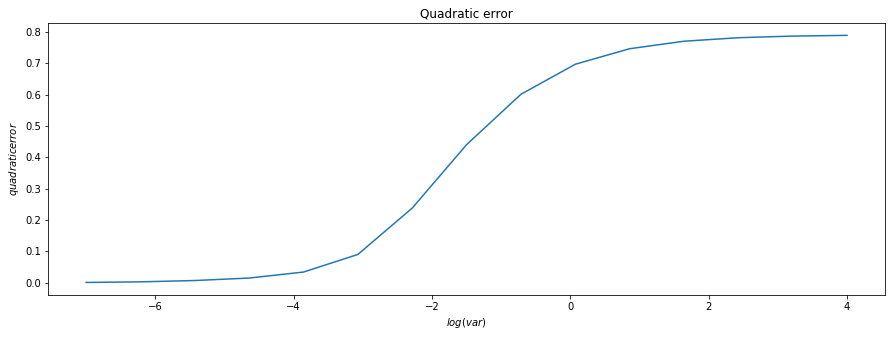

In [27]:
plt.plot((logVarList), errList)
plt.title('Quadratic error')
plt.xlabel('$log(var)$')
plt.ylabel('$quadratic error$')
plt.show()

Text(0, 0.5, 'Number of zeros')

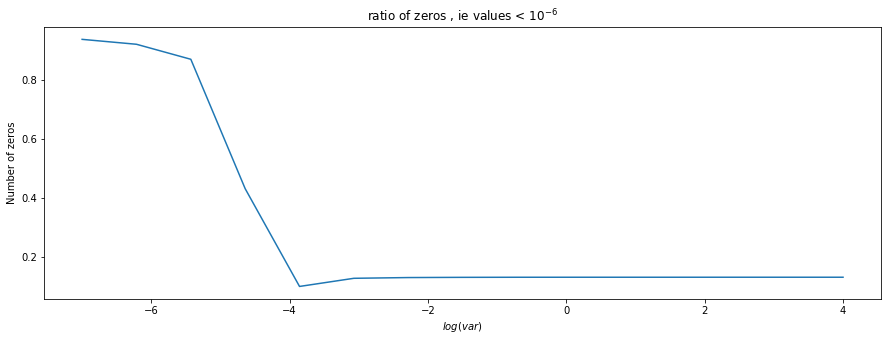

In [28]:
plt.plot((logVarList), countList)
plt.title('ratio of zeros , ie values < $10^{-6}$')
plt.xlabel('$log(var)$')
plt.ylabel('Number of zeros')

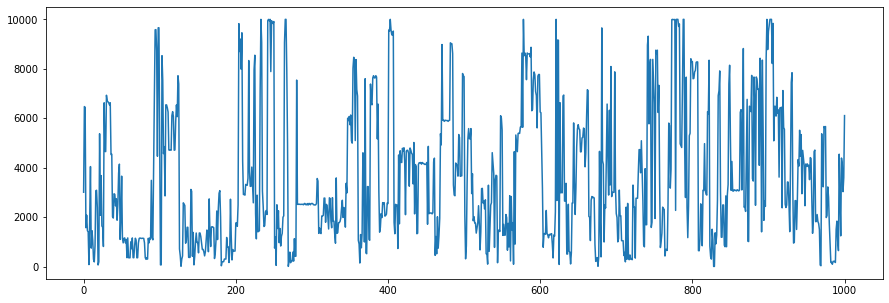

In [61]:
plt.plot(range(len(N)),N)

In [58]:
count_zeros(np.array(Y_hat))

0.17282717282717283

In [8]:
var = np.exp(-3.9)

In [10]:
df_approx = approx_freq(df, thresh=0.25, k=10000, var=var)

0
10000
20000
30000
40000
50000
60000
70000
80000



In [11]:
count_zeros(df_approx["Freq_sinistre"])

0.02670014215618838

In [16]:
err = np.sqrt(np.mean((df["Freq_sinistre"]-df_approx["Freq_sinistre"])**2))
err

0.03607394087689806

In [22]:
data_contrats_approx = data_contrats.copy()
data_contrats["Freq_sinistre"] = df_approx["Freq_sinistre"]

In [26]:
data_contrats.to_csv("train_contrats_approx.csv", index=False)

In [18]:
os.getcwd()

'C:\\Users\\User\\Documents\\GitHub'

In [ ]:
df_approx = approx_freq(df, thresh=0.25, k=10000, var=np.exp(-4.1))

0
10000
20000
30000
40000
50000
60000
70000
